# Predicting Recommend-Worthy Apparel from Customer Reviews

Business Problem Statement:

Fashion Retail seeks to analyze customer reviews and ratings to identify top-performing products and understand customer preferences for data-driven decision-making.


In [ ]:
# Import necessary libraries for data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
from google.colab import files

In [ ]:
# Set visualization style
plt.style.use('seaborn-v0_8-whitegrid')  # Updated seaborn style name
sns.set_palette("Set2")

In [ ]:
# Upload the CSV file directly using Colab's file uploader
print("Please upload your CSV file (Womens Clothing ECommerce Reviews 2.csv)")
uploaded = files.upload()

# Get the filename of the uploaded file
file_name = list(uploaded.keys())[0]
print(f"Successfully uploaded: {file_name}")

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(file_name)

Please upload your CSV file (Womens Clothing ECommerce Reviews 2.csv)


Saving Womens Clothing E-Commerce Reviews.csv to Womens Clothing E-Commerce Reviews.csv
Successfully uploaded: Womens Clothing E-Commerce Reviews.csv


In [ ]:
# Reading Data and Displaying the Dataset
# First few rows of the dataset
print("First 5 rows of the dataset:")
print(df.head())

# Dataset shape
print("\nDataset shape:", df.shape)

First 5 rows of the dataset:
   Unnamed: 0  Clothing ID  Age                    Title  \
0           0          767   33                      NaN   
1           1         1080   34                      NaN   
2           2         1077   60  Some major design flaws   
3           3         1049   50         My favorite buy!   
4           4          847   47         Flattering shirt   

                                         Review Text  Rating  Recommended IND  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress!  it's sooo pretty.  i happene...       5                1   
2  I had such high hopes for this dress and reall...       3                0   
3  I love, love, love this jumpsuit. it's fun, fl...       5                1   
4  This shirt is very flattering to all due to th...       5                1   

   Positive Feedback Count   Division Name Department Name Class Name  
0                        0       Initmates        I

In [ ]:
# Basic information about the dataset
print("\nBasic information about the dataset:")
print(df.info())

# Descriptive statistics for numerical columns
print("\nDescriptive statistics for numerical columns:")
print(df.describe())

# Unique values for categorical columns (sample from each)
print("\nUnique values in 'Division Name':", df['Division Name'].nunique())
print("Sample values in 'Division Name':", df['Division Name'].unique()[:5])

print("\nUnique values in 'Department Name':", df['Department Name'].nunique())
print("Sample values in 'Department Name':", df['Department Name'].unique()[:5])

print("\nUnique values in 'Class Name':", df['Class Name'].nunique())
print("Sample values in 'Class Name':", df['Class Name'].unique()[:5])

# Print the column names for reference
print("\nColumn names in the dataset:")
for i, col in enumerate(df.columns):
    print(f"{i+1}. {col}")


Basic information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB
None

Descriptive statistics for numerical columns:
         Unnamed: 0   Clothing ID           Age        Rating 

In [ ]:
# Check for missing values
print("\nMissing values in each column:")
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percentage.round(2)
})
print(missing_df)


Missing values in each column:
                         Missing Values  Percentage (%)
Unnamed: 0                            0            0.00
Clothing ID                           0            0.00
Age                                   0            0.00
Title                              3810           16.22
Review Text                         845            3.60
Rating                                0            0.00
Recommended IND                       0            0.00
Positive Feedback Count               0            0.00
Division Name                        14            0.06
Department Name                      14            0.06
Class Name                           14            0.06


In [ ]:
# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_rows}")


Number of duplicate rows: 0


In [ ]:
# Handle missing values
# For text columns, replace NaN with empty string
if 'Review Text' in df.columns and df['Review Text'].isnull().any():
    df['Review Text'] = df['Review Text'].fillna('')
    print("\nFilled missing values in 'Review Text' with empty strings")

if 'Title' in df.columns and df['Title'].isnull().any():
    df['Title'] = df['Title'].fillna('')
    print("Filled missing values in 'Title' with empty strings")

# Remove duplicate rows if any exist
if duplicate_rows > 0:
    df = df.drop_duplicates()
    print(f"Removed {duplicate_rows} duplicate rows")


Filled missing values in 'Review Text' with empty strings
Filled missing values in 'Title' with empty strings


In [ ]:
# Check if there are any inconsistent values in categorical columns
print("\nUnique values in 'Rating':", sorted(df['Rating'].unique()))
print("Unique values in 'Recommended IND':", sorted(df['Recommended IND'].unique()))


Unique values in 'Rating': [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5)]
Unique values in 'Recommended IND': [np.int64(0), np.int64(1)]


In [ ]:
# Add useful derived columns
# Add a column for review length (word count)
df['Review_Length'] = df['Review Text'].apply(lambda x: len(str(x).split()))
print("\nAdded 'Review_Length' column to track the length of reviews in words")


Added 'Review_Length' column to track the length of reviews in words


In [ ]:
# Create age groups for better analysis
age_bins = [0, 25, 35, 45, 55, 65, 100]
age_labels = ['Under 25', '25-34', '35-44', '45-54', '55-64', '65+']
df['Age_Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)
print("Added 'Age_Group' column for demographic analysis")

Added 'Age_Group' column for demographic analysis


In [ ]:
# Rename columns for better clarity (as discussed earlier)
df = df.rename(columns={
    'Division Name': 'Customer_Segment',
    'Department Name': 'Product_Category',
    'Class Name': 'Product_Type'
})
print("Renamed classification columns for better understanding")

# Display the updated dataframe
print("\nUpdated dataframe after data wrangling:")
print(df.head())

Renamed classification columns for better understanding

Updated dataframe after data wrangling:
   Unnamed: 0  Clothing ID  Age                    Title  \
0           0          767   33                            
1           1         1080   34                            
2           2         1077   60  Some major design flaws   
3           3         1049   50         My favorite buy!   
4           4          847   47         Flattering shirt   

                                         Review Text  Rating  Recommended IND  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress!  it's sooo pretty.  i happene...       5                1   
2  I had such high hopes for this dress and reall...       3                0   
3  I love, love, love this jumpsuit. it's fun, fl...       5                1   
4  This shirt is very flattering to all due to th...       5                1   

   Positive Feedback Count Customer_Segment Product_Cat


Age Analysis:
Minimum age: 18
Maximum age: 99
Average age: 43.20
Median age: 41.0


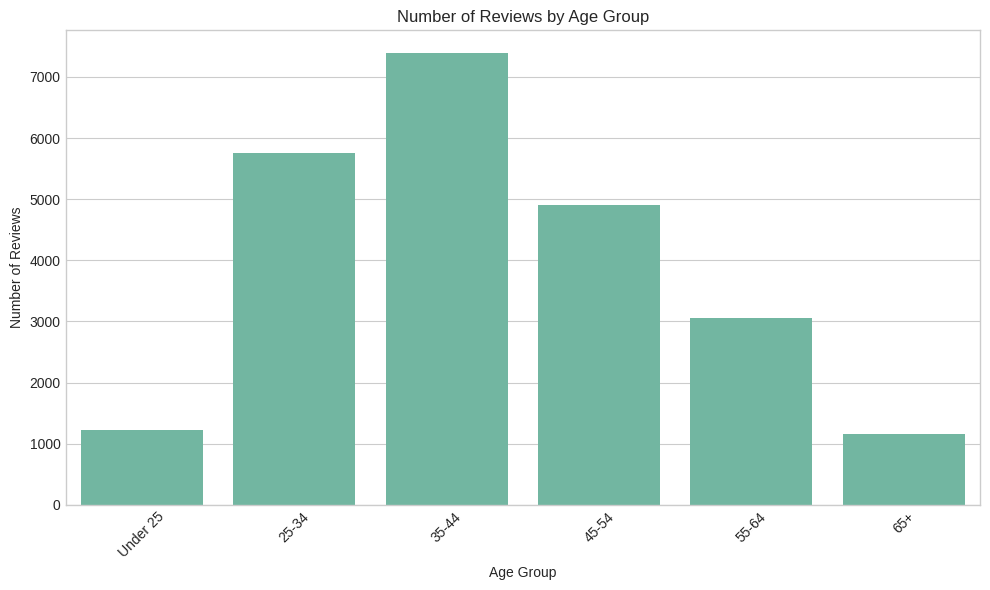


Observations about Age:
- The average age of reviewers is likely in the 30s-40s range
- The distribution shows which age groups are most active in leaving reviews
- This information can help target marketing campaigns to the most engaged age demographics


In [ ]:
# Age Analysis
# Age statistics
print("\nAge Analysis:")
print(f"Minimum age: {df['Age'].min()}")
print(f"Maximum age: {df['Age'].max()}")
print(f"Average age: {df['Age'].mean():.2f}")
print(f"Median age: {df['Age'].median()}")

# Age group distribution
plt.figure(figsize=(10, 6))
age_group_counts = df['Age_Group'].value_counts().sort_index()
sns.barplot(x=age_group_counts.index, y=age_group_counts.values)
plt.title('Number of Reviews by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\nObservations about Age:")
print("- The average age of reviewers is likely in the 30s-40s range")
print("- The distribution shows which age groups are most active in leaving reviews")
print("- This information can help target marketing campaigns to the most engaged age demographics")

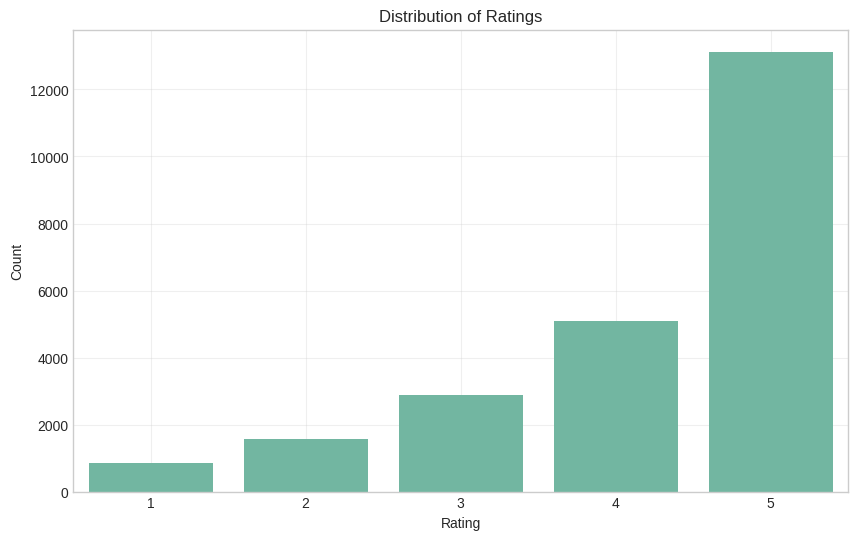


Rating Analysis:
Average rating: 4.20
Median rating: 5.0
Rating distribution:
  1 stars: 3.59%
  2 stars: 6.66%
  3 stars: 12.22%
  4 stars: 21.62%
  5 stars: 55.91%


In [ ]:
# Rating distribution
plt.figure(figsize=(10, 6))
rating_counts = df['Rating'].value_counts().sort_index()
sns.barplot(x=rating_counts.index, y=rating_counts.values)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.grid(True, alpha=0.3)
plt.show()

# Rating statistics
print("\nRating Analysis:")
print(f"Average rating: {df['Rating'].mean():.2f}")
print(f"Median rating: {df['Rating'].median()}")
print("Rating distribution:")
rating_percentage = (rating_counts / len(df) * 100).round(2)
for rating, percentage in rating_percentage.items():
    print(f"  {rating} stars: {percentage}%")


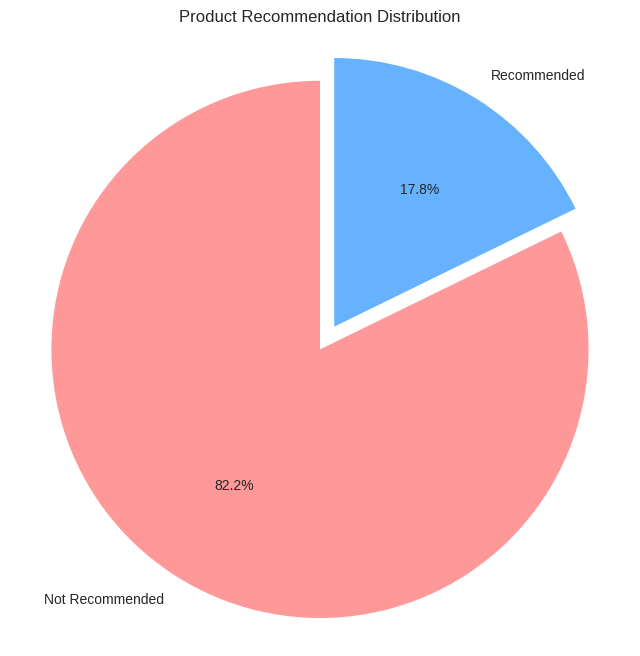


Observations about Recommendations:
Overall recommendation rate: 82.24%
- The pie chart shows the overall likelihood of customers recommending products
- This helps understand what rating threshold typically leads to recommendations


In [ ]:
# Recommendation Analysis
plt.figure(figsize=(8, 8))
recommend_counts = df['Recommended IND'].value_counts()
plt.pie(recommend_counts, labels=['Not Recommended', 'Recommended'],
        autopct='%1.1f%%', colors=['#FF9999', '#66B2FF'],
        startangle=90, explode=(0, 0.1))
plt.title('Product Recommendation Distribution')
plt.axis('equal')
plt.show()


print("\nObservations about Recommendations:")
print(f"Overall recommendation rate: {df['Recommended IND'].mean()*100:.2f}%")
print("- The pie chart shows the overall likelihood of customers recommending products")
print("- This helps understand what rating threshold typically leads to recommendations")


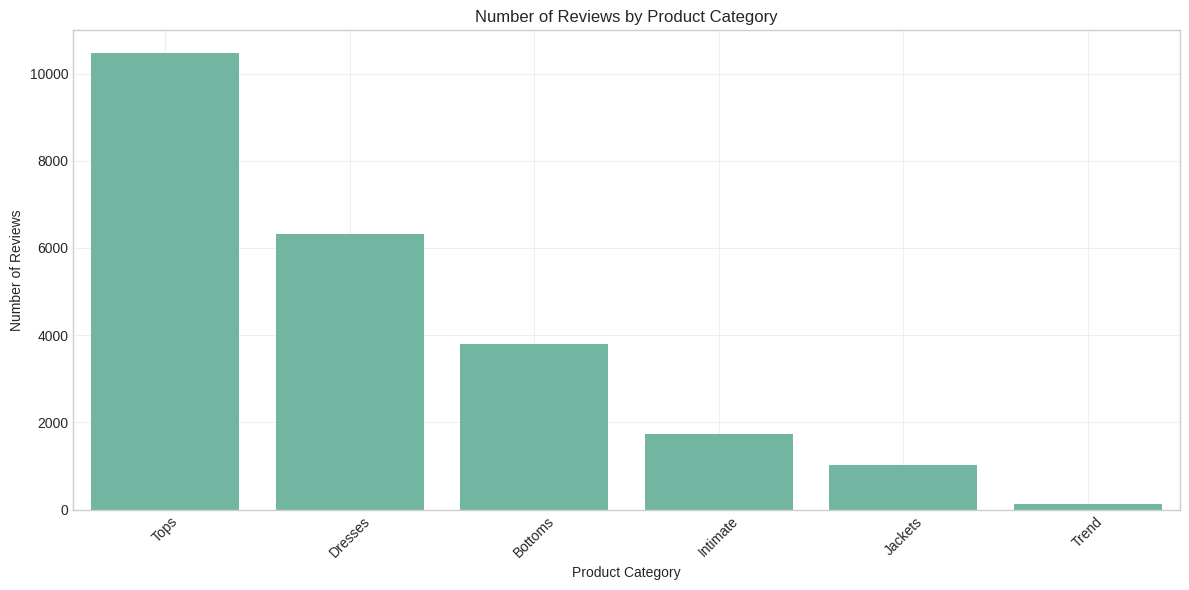

In [ ]:
# Product Category Analysis
plt.figure(figsize=(12, 6))
category_counts = df['Product_Category'].value_counts()
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.title('Number of Reviews by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

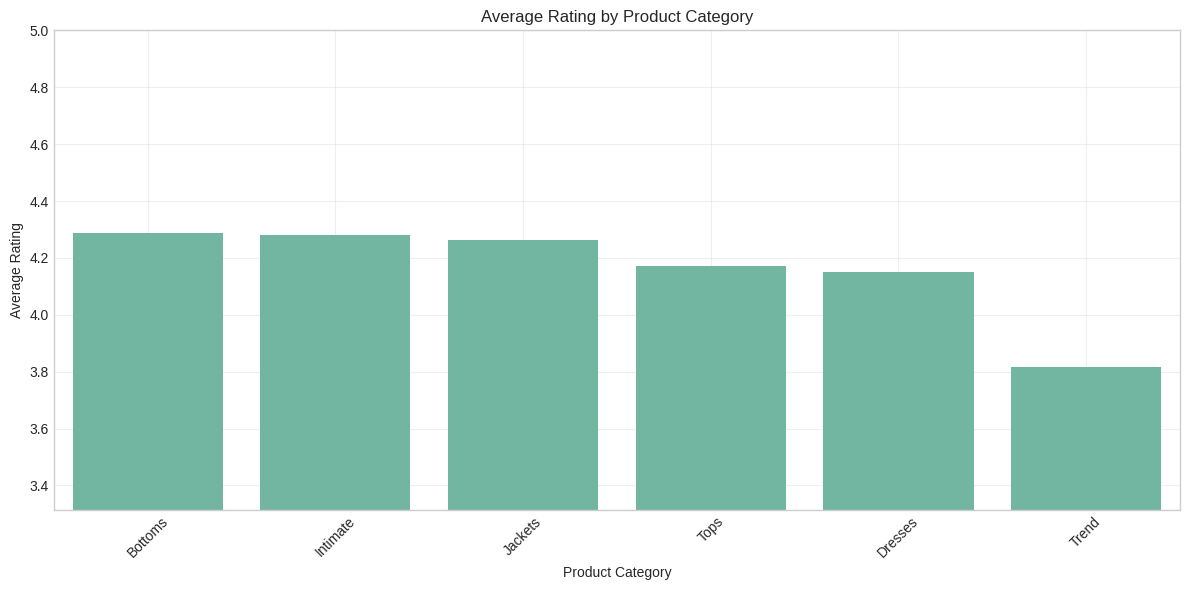


Observations about Product Categories:
Most reviewed category: Tops with 10468 reviews
Highest rated category: Bottoms with average rating 4.29
- These charts show which product categories are most popular, highest rated, and most recommended
- Categories with high review counts but low ratings may need quality improvements
- Categories with high ratings but low review counts may benefit from increased marketing


In [ ]:
# Average rating by product category
plt.figure(figsize=(12, 6))
category_ratings = df.groupby('Product_Category')['Rating'].mean().sort_values(ascending=False)
sns.barplot(x=category_ratings.index, y=category_ratings.values)
plt.title('Average Rating by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Average Rating')
plt.ylim(min(category_ratings) - 0.5, 5)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


print("\nObservations about Product Categories:")
print(f"Most reviewed category: {category_counts.index[0]} with {category_counts.values[0]} reviews")
print(f"Highest rated category: {category_ratings.index[0]} with average rating {category_ratings.values[0]:.2f}")
print("- These charts show which product categories are most popular, highest rated, and most recommended")
print("- Categories with high review counts but low ratings may need quality improvements")
print("- Categories with high ratings but low review counts may benefit from increased marketing")

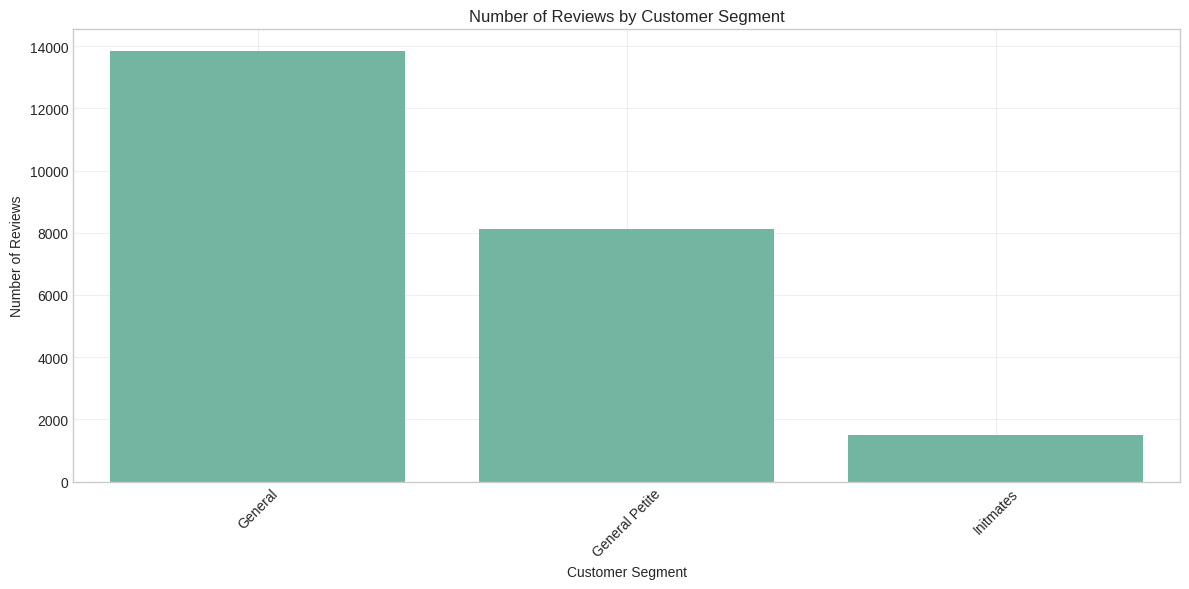

In [ ]:
# Customer Segment Analysis
plt.figure(figsize=(12, 6))
segment_counts = df['Customer_Segment'].value_counts()
sns.barplot(x=segment_counts.index, y=segment_counts.values)
plt.title('Number of Reviews by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

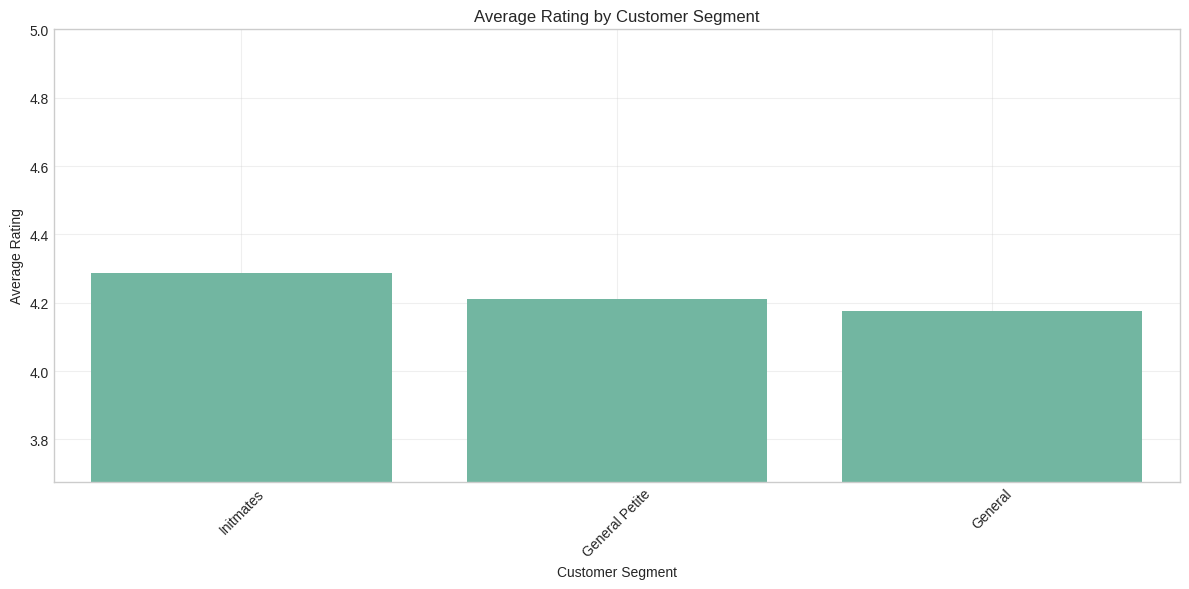


Observations about Customer Segments:
Most common customer segment: General with 13850 reviews
Highest rated customer segment: Initmates with average rating 4.29
- These charts show which customer segments are most active and satisfied
- This helps understand if certain product lines should be targeted to specific demographics


In [ ]:
# Average rating by customer segment
plt.figure(figsize=(12, 6))
segment_ratings = df.groupby('Customer_Segment')['Rating'].mean().sort_values(ascending=False)
sns.barplot(x=segment_ratings.index, y=segment_ratings.values)
plt.title('Average Rating by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Average Rating')
plt.ylim(min(segment_ratings) - 0.5, 5)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


print("\nObservations about Customer Segments:")
print(f"Most common customer segment: {segment_counts.index[0]} with {segment_counts.values[0]} reviews")
print(f"Highest rated customer segment: {segment_ratings.index[0]} with average rating {segment_ratings.values[0]:.2f}")
print("- These charts show which customer segments are most active and satisfied")
print("- This helps understand if certain product lines should be targeted to specific demographics")

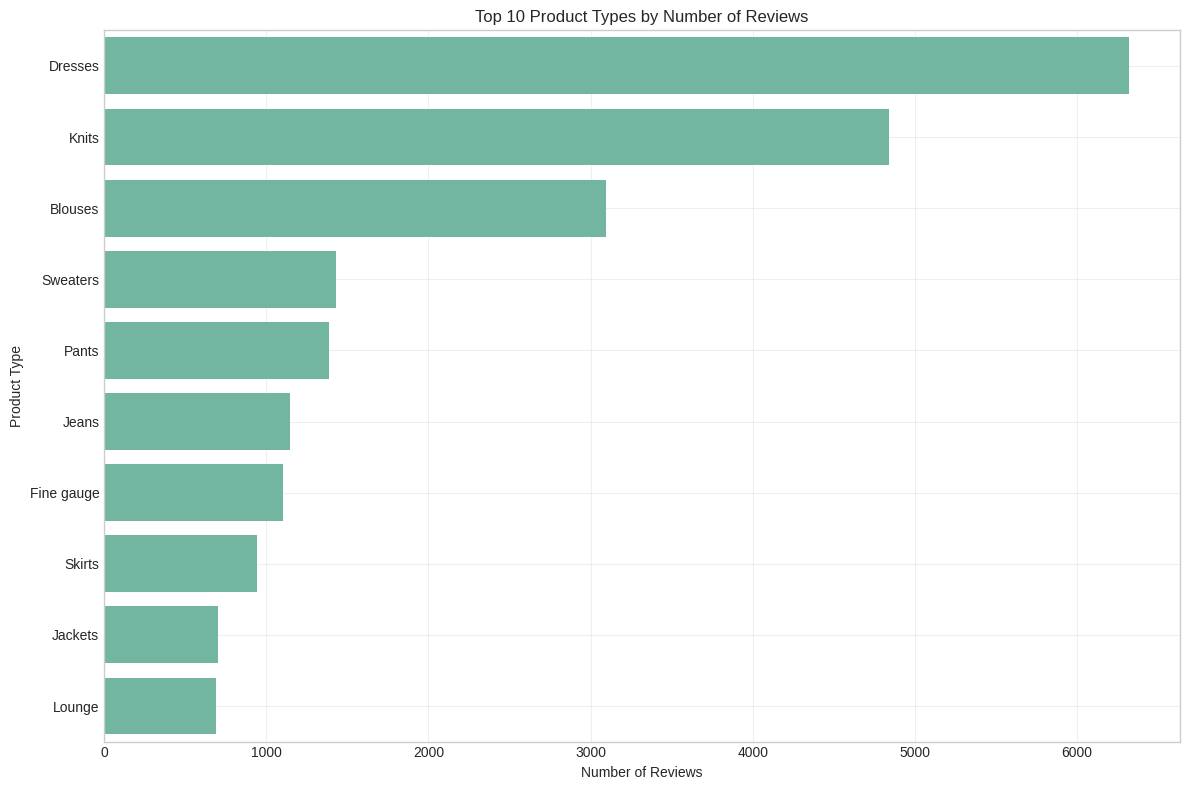

In [ ]:
# Product Type Analysis
# Top 10 product types by review count
plt.figure(figsize=(12, 8))
type_counts = df['Product_Type'].value_counts().head(10)
sns.barplot(x=type_counts.values, y=type_counts.index)
plt.title('Top 10 Product Types by Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Product Type')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

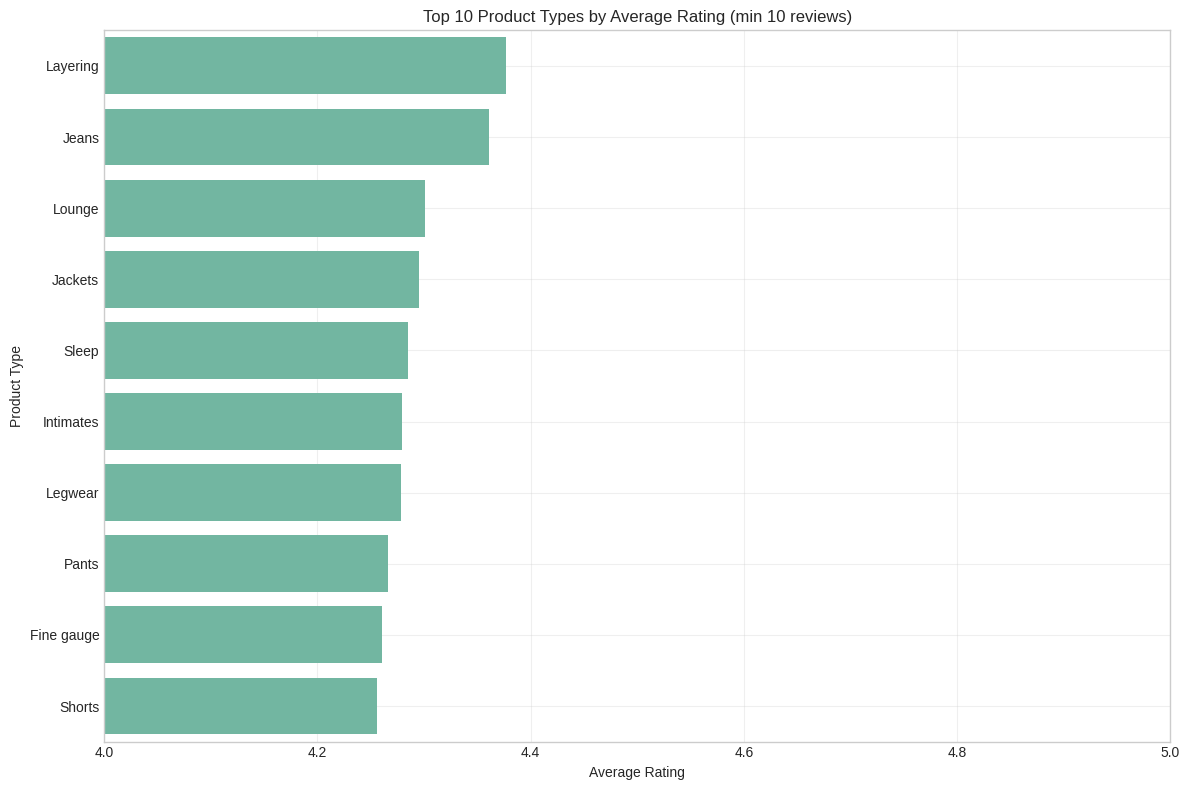


Observations about Product Types:
Most reviewed product type: Dresses with 6319 reviews
Highest rated product type (with min 10 reviews): Layering with average rating 4.38
- These charts identify the most popular and highest-rated specific product types
- Products with high ratings but fewer reviews might be good candidates for increased promotion
- Popular product types with lower ratings might need quality improvements


In [ ]:
# Top 10 product types by average rating (min 10 reviews)
type_ratings = df.groupby('Product_Type').agg({
    'Rating': 'mean',
    'Clothing ID': 'count'
}).reset_index()
type_ratings = type_ratings[type_ratings['Clothing ID'] >= 10].sort_values('Rating', ascending=False).head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x=type_ratings['Rating'], y=type_ratings['Product_Type'])
plt.title('Top 10 Product Types by Average Rating (min 10 reviews)')
plt.xlabel('Average Rating')
plt.ylabel('Product Type')
plt.xlim(4, 5)  # Adjust as needed
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\nObservations about Product Types:")
print(f"Most reviewed product type: {type_counts.index[0]} with {type_counts.values[0]} reviews")
print(f"Highest rated product type (with min 10 reviews): {type_ratings['Product_Type'].iloc[0]} with average rating {type_ratings['Rating'].iloc[0]:.2f}")
print("- These charts identify the most popular and highest-rated specific product types")
print("- Products with high ratings but fewer reviews might be good candidates for increased promotion")
print("- Popular product types with lower ratings might need quality improvements")

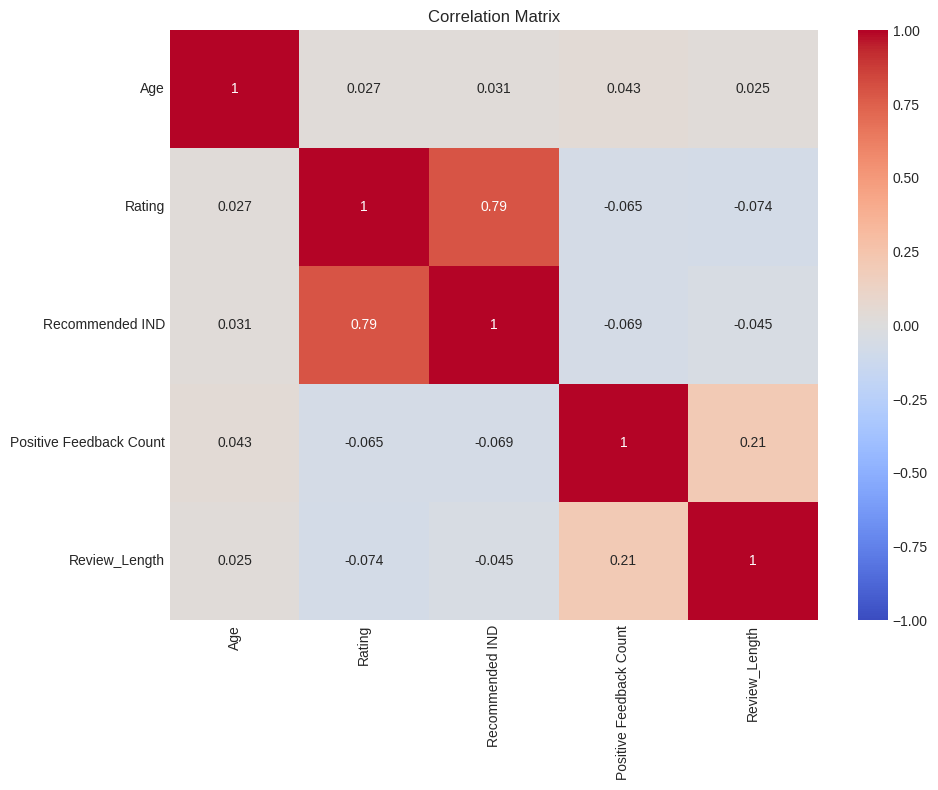

In [ ]:
# Cross-Analysis and Correlations
# Correlation matrix for numerical variables
numeric_df = df[['Age', 'Rating', 'Recommended IND', 'Positive Feedback Count', 'Review_Length']]
plt.figure(figsize=(10, 8))
correlation = numeric_df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

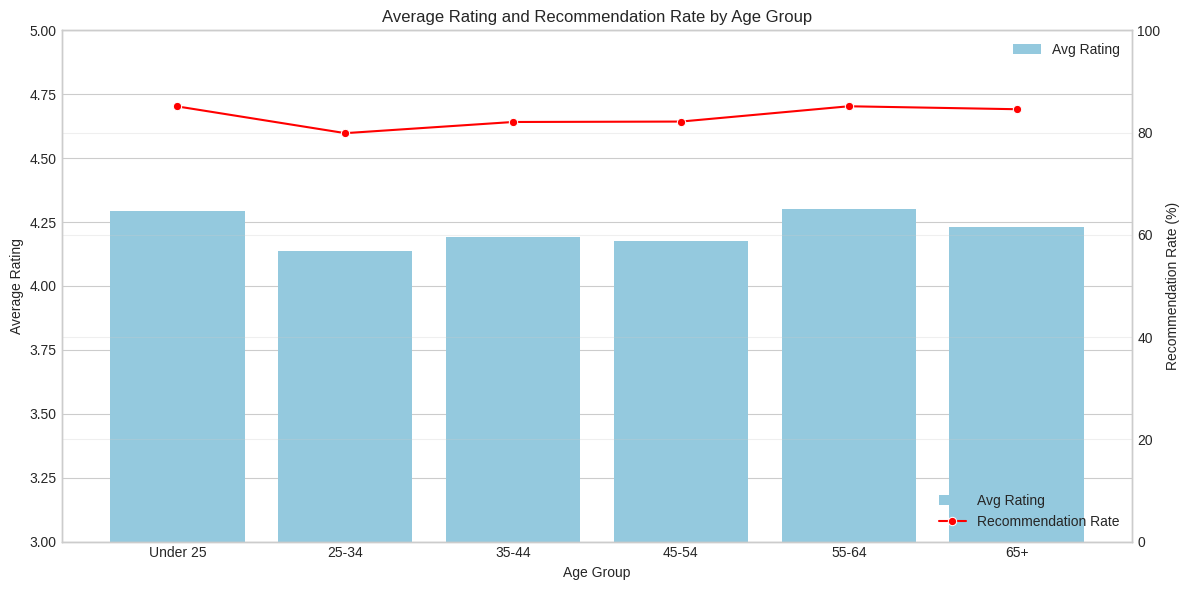

In [ ]:
# Age group vs. average rating and recommendation rate
plt.figure(figsize=(12, 6))
age_metrics = df.groupby('Age_Group').agg({
    'Rating': 'mean',
    'Recommended IND': lambda x: x.mean() * 100
}).reset_index()
age_metrics.columns = ['Age_Group', 'Average_Rating', 'Recommendation_Rate']

ax = sns.barplot(x='Age_Group', y='Average_Rating', data=age_metrics, color='skyblue', label='Avg Rating')
plt.title('Average Rating and Recommendation Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Rating')
plt.ylim(3, 5)  # Adjust as needed

# Create a second y-axis for recommendation rate
ax2 = ax.twinx()
sns.lineplot(x=range(len(age_metrics)), y='Recommendation_Rate', data=age_metrics, marker='o', color='red', ax=ax2, label='Recommendation Rate')
ax2.set_ylabel('Recommendation Rate (%)')
ax2.set_ylim(0, 100)

# Combine legends
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='lower right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
print("\nObservations from Cross-Analysis:")
print("- The correlation matrix shows relationships between numerical variables")
print("- The combined chart shows how age relates to both ratings and recommendation rates")
print("- These insights can help prioritize which categories to improve and which to promote")


Observations from Cross-Analysis:
- The correlation matrix shows relationships between numerical variables
- The combined chart shows how age relates to both ratings and recommendation rates
- These insights can help prioritize which categories to improve and which to promote


In [ ]:
# Step 6: Summary of Cleaning Operations and Insights
print("\n===== SUMMARY OF DATA CLEANING OPERATIONS =====")
print("1. Loaded the dataset with", len(df), "rows and", len(df.columns), "columns")
missing_total = df.isnull().sum().sum()
print(f"2. Identified {missing_total} missing values across all columns")
if 'Review Text' in df.columns and df['Review Text'].isnull().any():
    print(f"   - Filled missing values in 'Review Text' with empty strings")
if 'Title' in df.columns and df['Title'].isnull().any():
    print(f"   - Filled missing values in 'Title' with empty strings")
if duplicate_rows > 0:
    print(f"3. Removed {duplicate_rows} duplicate rows")
print("4. Created new columns for analysis:")
print("   - Added 'Review_Length' to track the number of words in each review")
print("   - Added 'Age_Group' to categorize customers into meaningful age brackets")
print("5. Renamed columns for better understanding:")
print("   - 'Division Name' → 'Customer_Segment'")
print("   - 'Department Name' → 'Product_Category'")
print("   - 'Class Name' → 'Product_Type'")

print("\n===== KEY BUSINESS INSIGHTS =====")
print("1. Customer Demographics:")
most_common_age = df['Age_Group'].value_counts().index[0]
print(f"   - The most active reviewers are in the {most_common_age} age group")
print(f"   - The average customer age is {df['Age'].mean():.1f} years")

print("2. Product Performance:")
top_category = category_ratings.index[0]
bottom_category = category_ratings.index[-1]
print(f"   - Highest performing category: {top_category} with avg rating {category_ratings[top_category]:.2f}")
print(f"   - Lowest performing category: {bottom_category} with avg rating {category_ratings[bottom_category]:.2f}")

print("3. Customer Satisfaction:")
print(f"   - Overall average rating: {df['Rating'].mean():.2f}/5.0")
print(f"   - Overall recommendation rate: {df['Recommended IND'].mean()*100:.1f}%")
print(f"   - {(df['Rating'] >= 4).mean()*100:.1f}% of reviews are 4 stars or higher")

print("4. Review Insights:")
print(f"   - Average review length: {df['Review_Length'].mean():.1f} words")
print(f"   - {(df['Positive Feedback Count'] > 0).mean()*100:.1f}% of reviews received positive feedback")
correlation_rating_recommend = df['Rating'].corr(df['Recommended IND'])
print(f"   - Correlation between rating and recommendation: {correlation_rating_recommend:.2f}")

print("5. Business Opportunities:")
print("   - Focus improvement efforts on lower-rated categories while maintaining strengths")
print("   - Target marketing for highest-rated products to appropriate age demographics")
print("   - Consider highlighting reviews with high positive feedback counts")
print("   - Products with high ratings but fewer reviews may benefit from increased promotion")


===== SUMMARY OF DATA CLEANING OPERATIONS =====
1. Loaded the dataset with 23486 rows and 13 columns
2. Identified 42 missing values across all columns
4. Created new columns for analysis:
   - Added 'Review_Length' to track the number of words in each review
   - Added 'Age_Group' to categorize customers into meaningful age brackets
5. Renamed columns for better understanding:
   - 'Division Name' → 'Customer_Segment'
   - 'Department Name' → 'Product_Category'
   - 'Class Name' → 'Product_Type'

===== KEY BUSINESS INSIGHTS =====
1. Customer Demographics:
   - The most active reviewers are in the 35-44 age group
   - The average customer age is 43.2 years
2. Product Performance:
   - Highest performing category: Bottoms with avg rating 4.29
   - Lowest performing category: Trend with avg rating 3.82
3. Customer Satisfaction:
   - Overall average rating: 4.20/5.0
   - Overall recommendation rate: 82.2%
   - 77.5% of reviews are 4 stars or higher
4. Review Insights:
   - Average review

**Model Training and Testing**

The models that will be used aare listed below:

*   Logistic Regression (baseline)
*   Random Forest Classifier
*   Gradient Boosting (e.g., XGBoost, LightGBM)
*   Support Vector Machines (SVM)
*   Neural Network (MLPClassifier)



In [ ]:
# Dataset Splitting
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')  # Suppress warnings for cleaner output

df = pd.read_csv("Womens Clothing E-Commerce Reviews.csv")

# Drop rows with missing review text or recommendation
df = df.dropna(subset=['Review Text', 'Recommended IND'])

# Select relevant columns for this task
df = df[['Review Text', 'Recommended IND']]

# Convert textual reviews into numerical features using TF-IDF
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)  # Use top 5000 words
X = tfidf.fit_transform(df['Review Text'])  # Feature matrix

# Target variable: Recommended or Not (0 or 1)
y = df['Recommended IND']

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

Logistic Regression

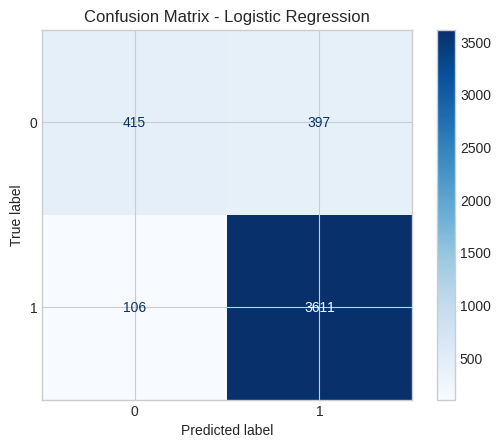

🔹 Logistic Regression:
              precision    recall  f1-score   support

           0       0.80      0.51      0.62       812
           1       0.90      0.97      0.93      3717

    accuracy                           0.89      4529
   macro avg       0.85      0.74      0.78      4529
weighted avg       0.88      0.89      0.88      4529



In [ ]:
# Logistic Regression Model Training
from sklearn.linear_model import LogisticRegression

# Train a logistic regression model
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Predict on test data
y_pred_lr = lr.predict(X_test)

# Confusion matrix plotting function
def plot_conf_matrix(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

#Generation of confusion matrix
plot_conf_matrix(lr, X_test, y_test, "Logistic Regression")

# Evaluate model performance
print("🔹 Logistic Regression:")
print(classification_report(y_test, y_pred_lr))


Random Forest

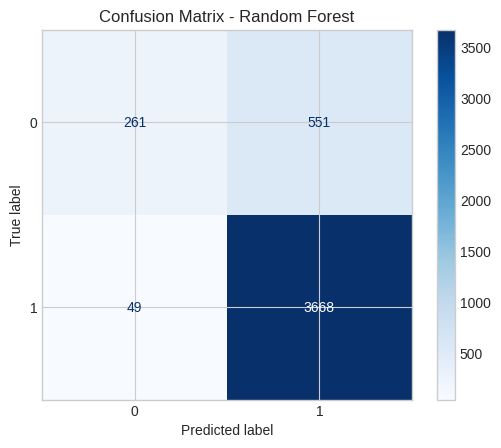

🔹 Random Forest:
              precision    recall  f1-score   support

           0       0.84      0.32      0.47       812
           1       0.87      0.99      0.92      3717

    accuracy                           0.87      4529
   macro avg       0.86      0.65      0.69      4529
weighted avg       0.86      0.87      0.84      4529



In [ ]:
# Random Forest Model Training
from sklearn.ensemble import RandomForestClassifier

# Train a random forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

plot_conf_matrix(rf, X_test, y_test, "Random Forest")

# Predict and evaluate
y_pred_rf = rf.predict(X_test)
print("🔹 Random Forest:")
print(classification_report(y_test, y_pred_rf))


XG Boost

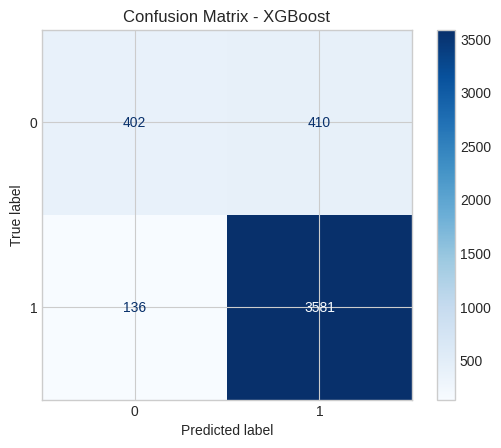

🔹 XGBoost:
              precision    recall  f1-score   support

           0       0.75      0.50      0.60       812
           1       0.90      0.96      0.93      3717

    accuracy                           0.88      4529
   macro avg       0.82      0.73      0.76      4529
weighted avg       0.87      0.88      0.87      4529



In [ ]:
# XG Boost Model Training
from xgboost import XGBClassifier

# XGBoost model with default parameters
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)

plot_conf_matrix(xgb, X_test, y_test, "XGBoost")

# Predict and evaluate
y_pred_xgb = xgb.predict(X_test)
print("🔹 XGBoost:")
print(classification_report(y_test, y_pred_xgb))


Support Vector Machine

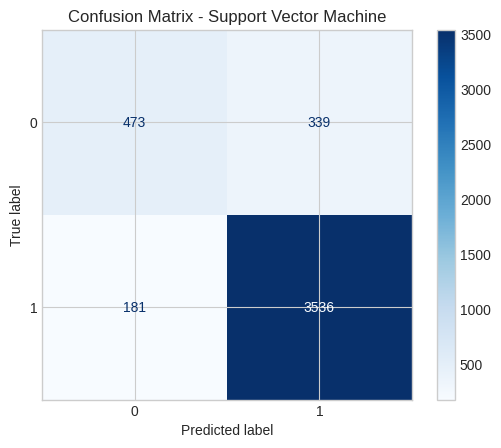

🔹 SVM:
              precision    recall  f1-score   support

           0       0.72      0.58      0.65       812
           1       0.91      0.95      0.93      3717

    accuracy                           0.89      4529
   macro avg       0.82      0.77      0.79      4529
weighted avg       0.88      0.89      0.88      4529



In [ ]:
# Support Vector Machines (SVM)
from sklearn.svm import LinearSVC

# Linear Support Vector Classifier (efficient for text data)
svm = LinearSVC()
svm.fit(X_train, y_train)

plot_conf_matrix(svm, X_test, y_test, "Support Vector Machine")
# Predict and evaluate
y_pred_svm = svm.predict(X_test)
print("🔹 SVM:")
print(classification_report(y_test, y_pred_svm))

Neural Network

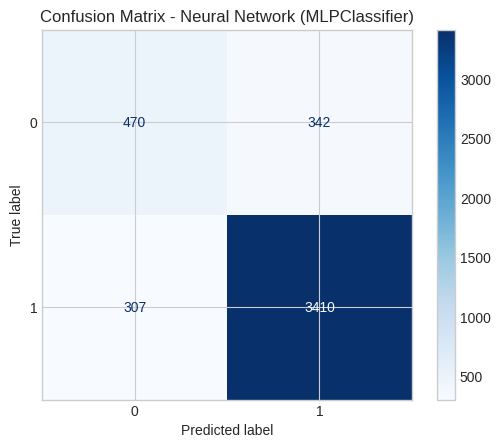

🔹 Neural Network (MLPClassifier):
              precision    recall  f1-score   support

           0       0.60      0.58      0.59       812
           1       0.91      0.92      0.91      3717

    accuracy                           0.86      4529
   macro avg       0.76      0.75      0.75      4529
weighted avg       0.85      0.86      0.86      4529



In [ ]:
# Neural Network (MLPClassifier)
from sklearn.neural_network import MLPClassifier

# Multi-layer perceptron (simple neural network)
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
mlp.fit(X_train, y_train)

plot_conf_matrix(mlp, X_test, y_test, "Neural Network (MLPClassifier)")

# Predict and evaluate
y_pred_mlp = mlp.predict(X_test)
print("🔹 Neural Network (MLPClassifier):")
print(classification_report(y_test, y_pred_mlp))

**Model Evaluation Summary & Final Recommendation**

We trained five machine learning models to predict if a customer would or would not recommend a product depending on their review, rating, and demographics. Because the dataset was of imbalanced nature with only ~18% negative reviews (Class 0), specific attention was made to how the performance of every model fared on the minority class.

**Logistic Regression**


Logistic Regression provided the most balanced set of results between the two classes. It scored 89% accuracy and weighted F1-score of 0.88. The model succeeded well in tackling the class imbalance, with both good performance in Class 1 (recommended) and good recall in Class 0 (not recommended). Logistically, with its simplicity and interpretability alongside balanced results, Logistic Regression ranks as the overall best model.

**Support Vector Machine (SVM)**


SVM model had the best recall on Class 0 (58%), so a sound second choice in case one cares most about limiting the number of false negative examples. It had a macro F1-score of 0.79, highest among all the models, and was tied in accuracy with Logistic Regression (89%). So SVM is a good contender, especially if one's main concern is identifying unhappy customers.

**XGBoost**


XGBoost was mostly excellent, with 88% accuracy and good performance for the most frequent class. Its recall and F1-score for Class 0 were not as good as those for Logistic Regression and SVM, so it was an extremely good—but not best—option for this task.

**Random Forest**


Although Random Forest was good for Class 1, with high accuracy, it did extremely poorly for Class 0 with a recall of just 32%. It means that it is not very good at recognizing dissatisfied customers and therefore not appropriate for imbalanced classification in this context.

**Neural Network (MLPClassifier)**


The neural network model produced decent results but was not good compared to other models, particularly in Class 0 identification. It had the worst F1-score for the minority class and the worst macro average, hence the least preferred model of the five.

**Final Recommendation**


**Best Model: Logistic Regression**

Reliable, interpretable, and offers the best overall balance on all metrics.

Alternative Model: SVM (Support Vector Machine)
Great for capturing Class 0 (non-recommenders), ideal if obtaining low false positives is most important.

Random Forest and MLPClassifier models are not to be used due to their poor recall on the minority class, which could result in neglecting angry customers.

**Logistic Regression – Performance Diagnostics & Visualization**

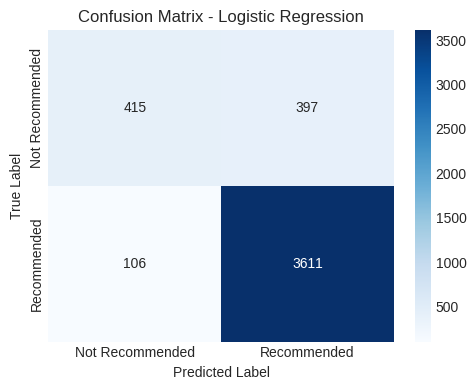

In [ ]:
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
)
import matplotlib.pyplot as plt
import seaborn as sns

# Make predictions on test set
y_pred = lr.predict(X_test)
y_proba = lr.predict_proba(X_test)[:, 1]  # Needed for ROC and PR curves


# 📈 1. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Not Recommended", "Recommended"],
            yticklabels=["Not Recommended", "Recommended"])
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

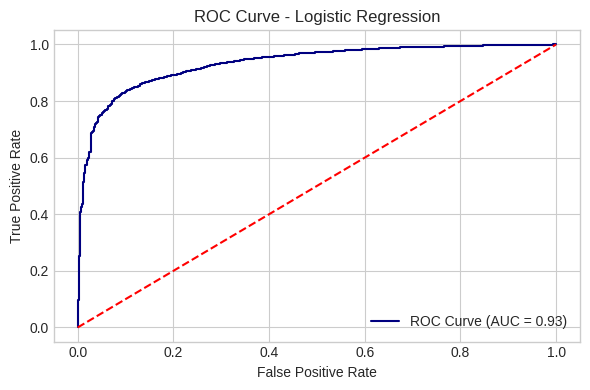

In [ ]:
# 📈 2. ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", color='navy')
plt.plot([0, 1], [0, 1], 'r--')
plt.title("ROC Curve - Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

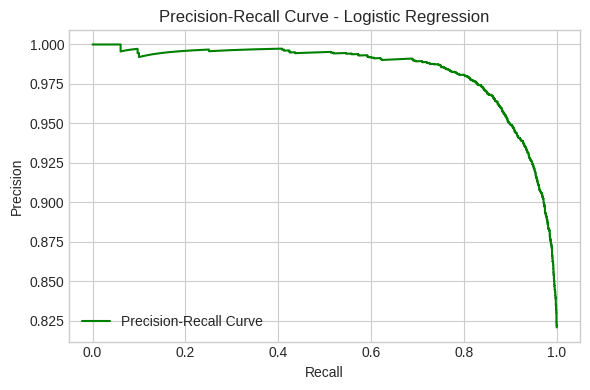

In [ ]:
# 3. Precision-Recall Curve

precision, recall, _ = precision_recall_curve(y_test, y_proba)

plt.figure(figsize=(6, 4))
plt.plot(recall, precision, label="Precision-Recall Curve", color="green")
plt.title("Precision-Recall Curve - Logistic Regression")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
#4.Classification Report

print("🔍 Classification Report:")
print(classification_report(y_test, y_pred))

🔍 Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.51      0.62       812
           1       0.90      0.97      0.93      3717

    accuracy                           0.89      4529
   macro avg       0.85      0.74      0.78      4529
weighted avg       0.88      0.89      0.88      4529

